In [299]:
from __future__ import division 
import numpy as np
import matplotlib.pyplot as plt
import random

import scipy.optimize as opt

import progressbar
widgets = [
        'Progress: ', progressbar.Percentage(),
        ' ', progressbar.Bar(marker=progressbar.RotatingMarker()),
        ' ', progressbar.ETA()]

In [233]:
def pdf(x, p):
    return p*np.exp(-p*x)

In [234]:
x_stepsize = 0.01
x_max = 1
xs = np.arange(0., x_max, x_stepsize)
p_stepsize = 1.
p_max = 100
ps = np.arange(0., p_max, p_stepsize)

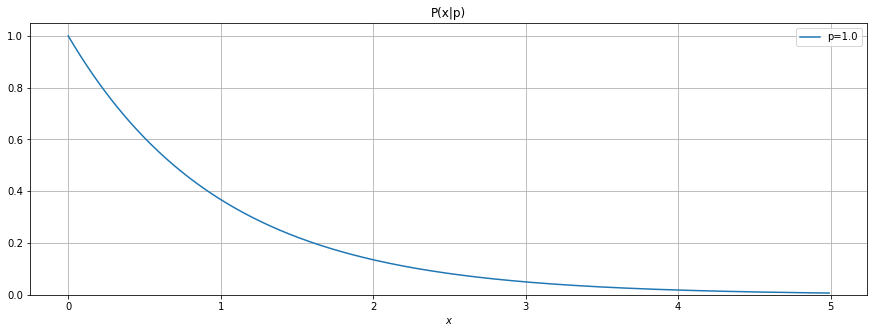

In [244]:
plt.figure(figsize=(15, 5))
p = 1
x_stepsize = 0.01
xs = np.arange(0., 5./p, x_stepsize)
plt.plot(xs, pdf(xs, p), label="p=%.1f" % p)
plt.title("P(x|p)")
plt.xlabel(r"$x$")
plt.grid()
plt.legend()
plt.ylim(0, p*1.05)
plt.show()

In [245]:
def generate_x():
    x = -np.log(random.random())
    return x

In [246]:
ns = np.array([2, 10, 100])
random_generated = []
for n in ns:
    rg = []
    for i in range(1,n+1):
        rg.append(generate_x())
    random_generated.append(rg)

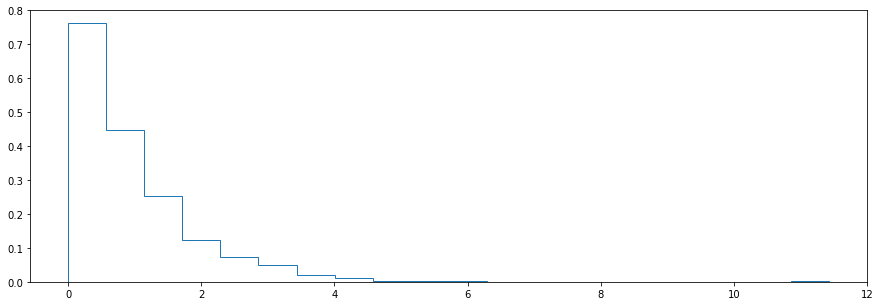

In [254]:
plt.figure(figsize=(15, 5))
h = plt.hist(random_generated[2], bins = 20, histtype='step',normed=True)
plt.show()

In [255]:
def midpoints(x_l):
    xm = []
    for i in range(0, len(x_l)-1):
        xm.append( x_l[i] + 0.5*(x_l[i+1]-x_l[i])  )
    return xm

In [267]:
def least_squared(p):
    ls = 0.
    n = len(rgda)
    for i in range(0,n): # random generated data array
        ls += (rgda[i]-pdf(cma[i], p))**2
    return np.sqrt(ls)/len(rgda)

In [272]:
cma = np.array(midpoints(h[1]))
rgda = np.array(h[0])
fr = opt.minimize(least_squared, 0.5) 
fr

      fun: 0.0014813902505666225
 hess_inv: array([[ 1.68302594]])
      jac: array([  9.13860276e-09])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([ 1.02209344])

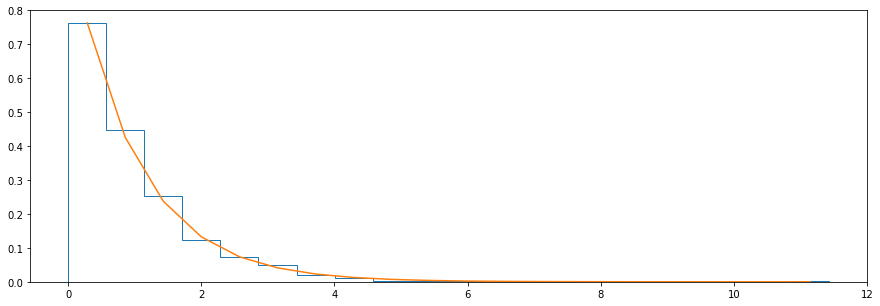

In [274]:
plt.figure(figsize=(15, 5))
h = plt.hist(random_generated[2], bins = 20, histtype='step',normed=True)
plt.plot(cma, pdf(cma, fr.x[0]))
plt.show()

In [ ]:
ns = np.array([2, 10, 100])
mle_results = []
n_experiments = 1000
for n in ns:
    mle_results.append([])
    
bar = progressbar.ProgressBar(widgets=widgets,maxval=n_experiments*len(ns)).start()
prog_i = 0
for iexp in range(0,n_experiments):
    for n in range(0,len(ns)):
        rg = []
        for i in range(0,ns[n]):
            rg.append(generate_x())
        h = plt.hist(rg, normed=True)
        cma = np.array(midpoints(h[1]))
        rgda = np.array(h[0])
        fr = opt.minimize(least_squared, 0.5) 
        mle_results[n].append(fr.x[0])  
        prog_i +=1
        bar.update(prog_i)
bar.finish()  
        

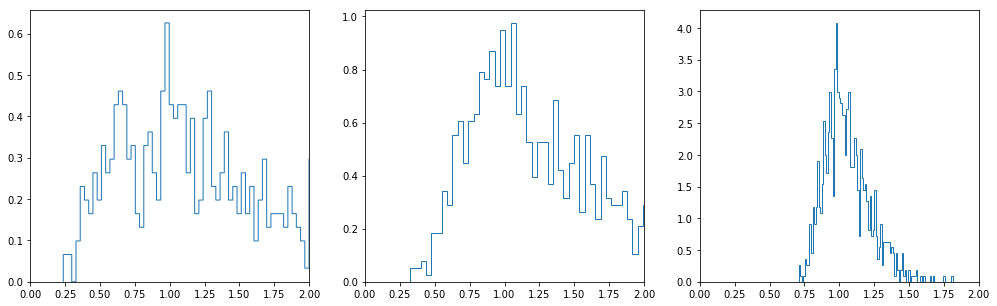

In [297]:
f, axes = plt.subplots(1, 3, figsize=(17,5))
x_A = np.arange(-2, 3, 0.01)
x_E0 = np.arange(-2, 2, 0.01)
for iax in range(0,len(axes)):
    plt.sca(axes[iax])
    nbins = 50*ns[-iax-1]
    plt.hist(mle_results[iax], normed=True, bins=nbins,histtype='step')
    plt.xlim(0, 2)
plt.show(f)

In [ ]:
n=200
mles = []
n_experiments = 100

    
bar = progressbar.ProgressBar(widgets=widgets,maxval=n_experiments).start()
prog_i = 0
for iexp in range(0,n_experiments):
    rg = []
    for i in range(0,n):
        rg.append(generate_x())
        h = plt.hist(rg, normed=True)
        cma = np.array(midpoints(h[1]))
        rgda = np.array(h[0])
        fr = opt.minimize(least_squared, 0.5) 
        mles.append(fr.x[0])  
    prog_i +=1
    bar.update(prog_i)
bar.finish()  

In [ ]:
plt.figure(figsize=(15, 5))
plt.hist(mles, normed=True, bins=100, histtype='step')
plt.show()